In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(1679, 1530, 309)

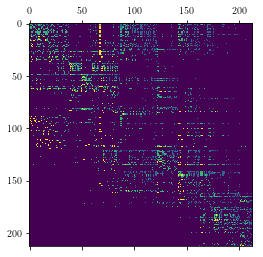

In [15]:
cortices = [[0, 38],
            [38, 73],
            [73, 98],
            [98, 119],
            [119, 139],
            [139, 152],
            [152, 164],
            [164, 175],
            [175, 186],
            [186, 195],
            [195, 203],
            [203, 210],
            [210, 213]]

data = pd.read_excel("../connectomes/mouse.xlsx", sheet_name=None)
metadata = pd.read_excel("../connectomes/mouse_meta.xlsx", sheet_name=None)

d = data["W_ipsi"]
p = data["PValue_ipsi"]

m = metadata["Voxel Count_295 Structures"]
m = m.loc[m["Represented in Linear Model Matrix"] == "Yes"]

columns = []
for region in ["Isocortex",
               "Olfactory Areas",
               "Hippocampal Formation",
               "Cortical Subplate",
               "Striatum",
               "Pallidum",
               "Thalamus",
               "Hypothalamus",
               "Midbrain",
               "Pons",
               "Medulla",
               "Cerebellar Cortex",
               "Cerebellar Nuclei"]:# m["Major Region"].unique():
    [columns.append(acronym.replace(" ", ""))
     for acronym 
     in m.loc[m["Major Region"] == region, "Acronym"].values]

d.head()

d = d[columns].reindex(columns)
p = p[columns].reindex(columns)

d = d.values
p = p.values

p[np.isnan(p)] = 1

d[p > 0.1] = 0

n = np.zeros_like(d)

for i in [1e-3, 1e-1, 1]:
    n[d >= i] += 1

plt.matshow(n)
len(n[n == 1]), len(n[n == 2]), len(n[n == 3])

In [6]:
nprime = np.loadtxt("../connectomes/cat_matrix.dat")

In [9]:
len(nprime[nprime == 1]), len(nprime[nprime == 2]), len(nprime[nprime == 3])

(535, 483, 122)